In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
import tensorflow as tf
from tensorflow import keras

## SAMPLE IMAGES OF THE DATASET

![image.png](attachment:image.png)

## **Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing**

![image.png](attachment:image.png)

In [ ]:
train_dir = r'..\data\train'  # Location of training images
validation_dir = r'..\data\validation' #Location of validation images
test_dir =r'..\data\test' #Location of test images

#

# I. MY MODEL

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

**We will be feeding the data into the model using ImageDataGenerator using flow_from1_directory method which will create an array iterator, this iterator will pick up images in specified batches from the specified directory and automatically feed it to the network for training.**

In [ ]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Although the Iterator will feed your data into the model and the labels will be assigned according to the file names, eg: my cat images are in cat folder so they will be assigned a label cat and similarly for dogs, obviously they would be coded to 0&1 before feeding into the model, but all this is done by the Iterator, so how will we know what are the labels??**

**Hence I have written a simple function which will plot a batch of images from the Iterator along with the assigned label, this is done using next() function which yeilds a batch of images from the Iterator and the class they belong to**

In [ ]:
def plots(ims, figsize=(16,16), rows=4, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

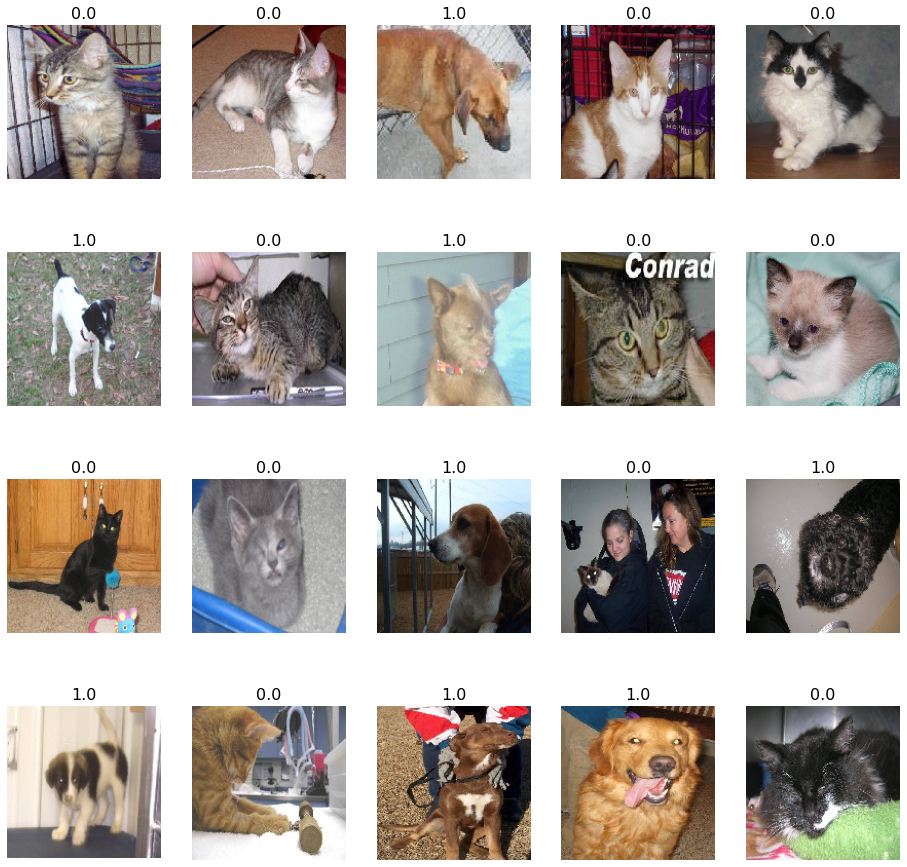

In [ ]:
imgs, labels = next(train_generator)
plots(imgs, titles=labels)

## As we can see cats are label 0 whereas dogs are label 1

In [ ]:
class_names = ['Cat','Dog'] #Creating a dictionary of class names according to the label

### MODEL ARCHITECTURE

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

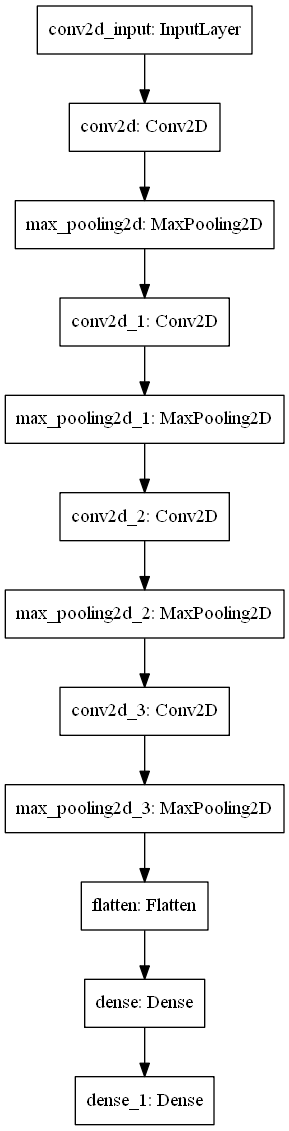

In [ ]:
#Plotting a graphical representation of the model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot

keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',                 #Since we have two classes I am using a binary cross entropy
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

* **For calculation of steps per epoch :**
  **Our train_generator is feeding data in batchs of 20 and the size of out test set is 2000
  hence maximum steps_per_epoch = 2000/20 = 100, for this value the whole data set will be feeded.**
* **Similarly for validation steps, our validation set is of size 1000 and we have a batch size of 20,
  thus maximum validation_steps = 50**

## TRAINING

**If you do not have a dedicated GPU then remove the tf.device line**

In [ ]:
with tf.device("/device:GPU:0"):      #To make sure that  the GPU is being used for training
    history = model.fit_generator(    #Feeding the data from iterator into the model using fit_generator() method
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 8s 82ms/step - loss: 0.6913 - acc: 0.5455 - val_loss: 0.6840 - val_acc: 0.5100
Epoch 2/20
100/100 [==============================] - 8s 83ms/step - loss: 0.6637 - acc: 0.5900 - val_loss: 0.6517 - val_acc: 0.6210
Epoch 3/20
100/100 [==============================] - 8s 82ms/step - loss: 0.6304 - acc: 0.6475 - val_loss: 0.6378 - val_acc: 0.6300
Epoch 4/20
100/100 [==============================] - 8s 82ms/step - loss: 0.5852 - acc: 0.6830 - val_loss: 0.6604 - val_acc: 0.6130
Epoch 5/20
100/100 [==============================] - 8s 83ms/step - loss: 0.5526 - acc: 0.7090 - val_loss: 0.5911 - val_acc: 0.6690
Epoch 6/20
100/100 [==============================] - 8s 83ms/step - loss: 0.5156 - acc: 0.7435 - val_loss: 0.5664 - val_acc: 0.6990
Epoch 7/20
100/100 [==============================] - 9s 88ms/step - loss: 0.4953 - acc: 0.7630 - val_loss: 0.5729 - val_acc: 0.7010
Epoch 8/20
100/100 [==============================] - 9s 88ms/step - 

## After training:
* **Validation accuracy:72.8%**
* **Training accuracy:92.55%**

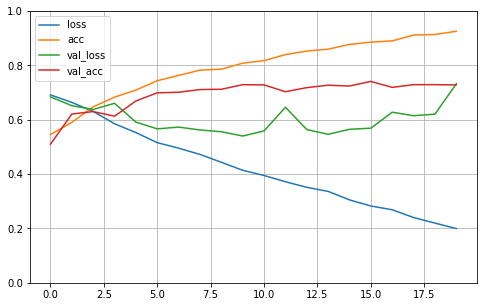

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))  #Plotting the model history by converting the data of epochs into a DataFrame
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As we can see the model overfits and is not converging, maybe if we train it for some more epochs we can acheive a validation accuracy of 80%

In [ ]:
model.save("my_model.h5")  #Saving the model weights to avoid retraining everytime

## LOADING THE MODEL USING THE .h5 file

In [ ]:
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## TESTING

### **Now we will test our model on the test set**

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


**For plotting the results I have written this code, first of all using the next() method I load a batch of 20 images into the imgs variable.**

**Now for predicting and plotting the images one by one we need to pass the images with a batch size of 1, if you will print the shape of imgs the result is (20,150,150,3), hence if we pass this to the predictor then instead of getting a single prediction we will get an array of 20 oredicted values which then we will have to match one by one to the image.**

**Hence I first take every image from imgs and convert it to a batch size of 1 i.e the shape would now be (1,150,150,3). This is explained better below when I test a random image using the model**

**Now I pass this image to the model and the predicted value is compared with a threshold of 0.5 more like rounding off.**

**Since Dog is class 1 hence if predicted value is greater than 0.5 we predict it as a Dog and print the confidnece that is the predicted value.**

**Cat is class 0 hence if predicted value is less than 0.5 we predict it as a Dog and print the confidnece that is the (1-predicted value).**



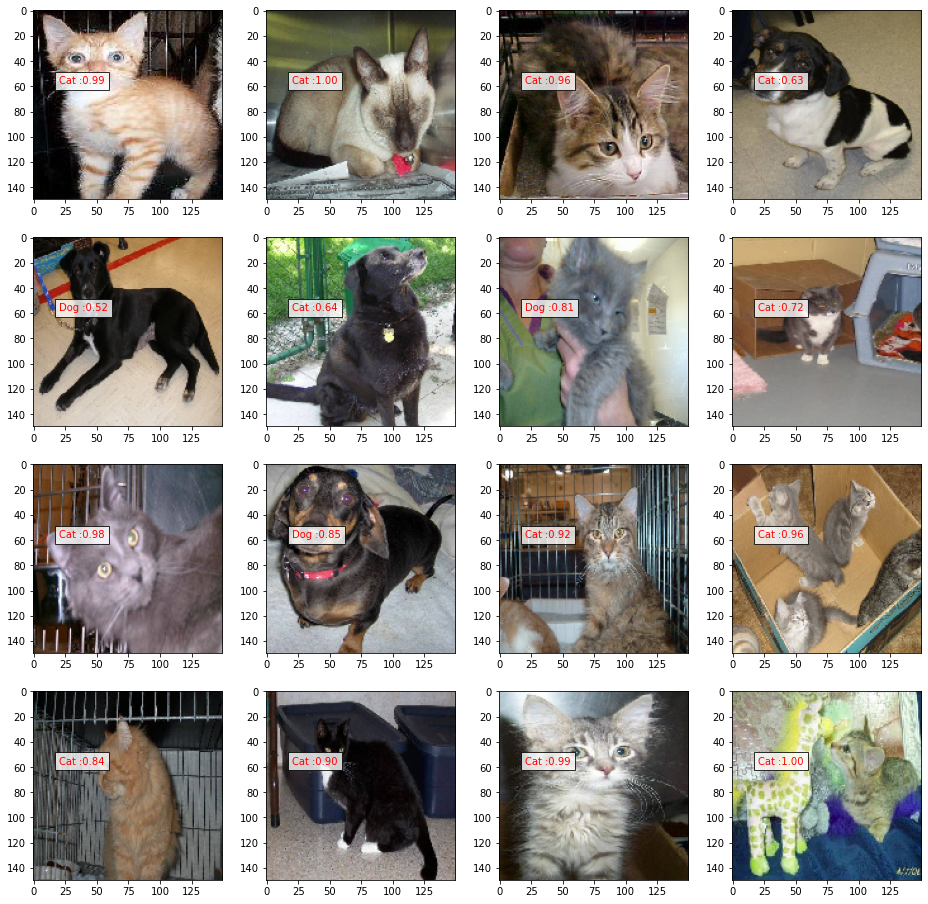

In [ ]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    if(prediction[:,:]>0.5):
        value ='Dog :%.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%.2f'%(1-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

In [ ]:
model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.6939732432365417, 0.7229999899864197]

### **As we can see we get a testing accuracy of 72.29%**

### Now we will test our model on random cat and dog images from the internet

Knowing how to preprocess images and use them for testing is an important and crucial step, due to increased reasearch nowdays we get prepared and cleaned datasets, however it is necessary to know how to process your own data, rather than just loading it using one command

**There are many methods in which you can view your images in python:**
* Open CV
* keras.preprocessing
* Pillow Library
* many more... (which I have not discovered yet)

**I am testing my model on two random images from the net, I will be showing ways to preprocess images using keras and pillow library, openCV is also a popular and very efficient method but the other two methdos are also pretty good and can perform simple operations on images, while OpenCV is dedicated for Vision and advanced processing of images, you can easliy get the implementation using OpenCV on the net, but I have not it in this project.**

**We are using binary cross entropy as the loss, our class0 is Cat and class1 is Dog. The output if the function will be between 0 &1.**
* If the output of the model is closer to 0 it is a Cat
* If the output of the model is closer to 1 it is a Dog

## Using Keras preprocessing

In [ ]:
from keras.preprocessing import image

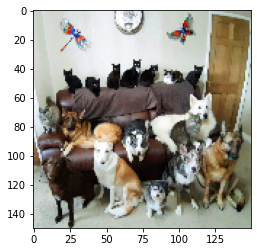

In [ ]:
#Loading and plotting the image
img = image.load_img('confuse.jpg', target_size=(150, 150))   #resizing and loading the image load_img method of keras
plt.imshow(img)        #imshow is a method of matplotlib for viewing images

As seen above this is an image containing many dogs and cats, the dogs are in the front and bigger in size and hence I expect the model to predict this image belonging to class Dog with a high confidence, also given that the accuracy was just 72%.

In [ ]:
test_image = image.img_to_array(img)  #Converting the jpg file to array of pixels
test_image.shape   #Checking the shape of image

(150, 150, 3)

**Althoguh this testing dimensions match with our input size, but if you directly feed the image to the model it will give you an error of bad dimensions, because whenever we feed an image to a model it is feeded in batches, the first dimension is taken as the batch size and rest as the input shape,in prepared datasets you get all this processsing done already hence testing on your ownm data is very important! When the Iterator was feeding the image, the batch size was 16 but here we are giving a single image hence the batch size is 1 so we will add a new axis '0' to the image using expand_dims, we can also resize the image, I have done that in the next example.**

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 150, 150, 3)

**bbox is used to display text on image, read the matplotlib documentation for more info.**

Predicted value: [[1.]]


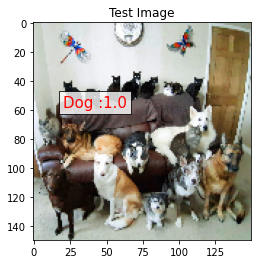

In [ ]:
pred=model.predict(test_image)             #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                          #Rounding off the output to nearest class 0 or 1
plt.title('Test Image')
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)

**As we can see this model predicts this image as a dog with 100% confidence, as the label for Dog is 1 and the predicted value id also 1!! Majorly because the accuracy was moderate and the model was overfitting, so it doesn't identify the cats in the given picture at all!**

## USING PILLOW(Python Imaging Library)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=926x615 at 0x1F6C040B608>


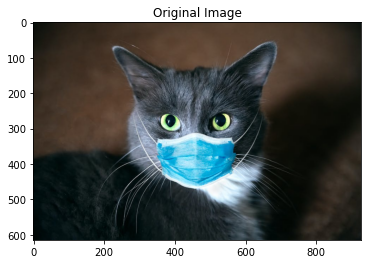

In [ ]:
from PIL import Image
img=Image.open('cat.jpg')     #The open method will just identify the image but the file image data is not read,indeed a lazy function!
print(img)
plt.title('Original Image')
plt.imshow(img)               #Hence we will plot the image using imshow method from matplotlib

As seen above this is an image of a cat wearing a mask! I expect the model to predict it as a cat with high confidence as the image contains just one object.

**PIL library has many more fucntions like rotate, alpha, blend etc for performing operations on image.**

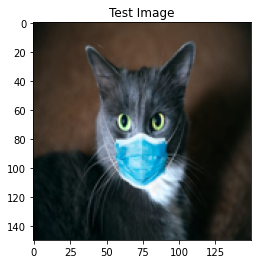

In [ ]:
new_img=img.resize((150,150)) #Resizing the image using resize() method of PIL library
new_img.save('cat_new.jpg')   #Saving the resized image
plt.title('Test Image')
plt.imshow(new_img)

As you can see in above two cells I have used plt.imshow() to plot the images, I have merely passed PIL Image object to it. The imshow() method can take an array of pixels or a PIL Image as input. Previously we had used expand dims to add the new axis representing the batch size, here I will be implementing that using array indexing but for that I need to convert my Image into an array, for that I will be using the imread() method.

In [ ]:
new_img = plt.imread('cat_new.jpg')
new_img=new_img/255.
new_img=new_img[np.newaxis,:,:,:]
new_img.shape

(1, 150, 150, 3)

Predicted value: [[0.03016276]]


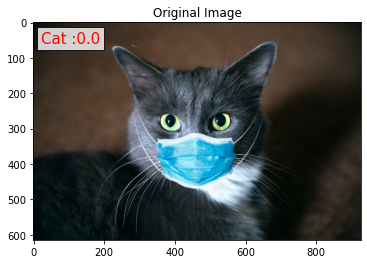

In [ ]:
pred=model.predict(new_img)              #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                        #Rounding off the output to nearest class 0 or 1
plt.title('Original Image')
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)                                                                            #Read the matplotlib documentation for more info.

**As we can see this model predicts this image as a cat with 97% confidence, as the label for Cat is 0 and the predicted value is 0.03. This is a pretty good result but we should train our model to avoid that 3% error as well. Ideally the output should be 0 as Cat belongs to class 0.**

**Basically the model predcits the image as 97% Cat and 3 % Dog!**

In [ ]:
from tensorflow.keras import backend as K

K.clear_session() # Clearing the variables of previous session
del model   #Deleting the previous model so that we can load our new model and perform test on it

#

**======================================================================================================================**
**======================================================================================================================**

#

# II. DATA AUGMENTATION

## The testing and validation is performed for the same images in all models hence for detailed explanation refer the testing and preprocessing parts of MY MODEL

Shear & Rotation:
![image.png](attachment:image.png)

The textbook definition of data augmentataion would be:

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

Here I would be using the ImageDataGenrator from keras to perform various operations on my training images like shear, rescale, rotate etc. For more information visit the Keras official documentation. The need to do augmentation is because I only have 2000 training images which is a small number to be honest; given the amount of data being generated regualarly, so I would be performing various operations on my data and then feeding it to the model, now my model is trained to identify a rotated cat as a cat and not some othe object, thereby increasing the performance of my model!!

**Note: The method which I have used just performs data augmentation and feeds the images to the model, for every batch it performs the given operations randomly on the images and feeds the batch of images to the model, overall 2000 images are only being fed, no new data is genrated. For saving the augmented images you have to use the save_to_dir attribute and then add those data to your train folder so now you will have more images! For more information visit the Keras official documentation.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Note that I have performed the data augmentation only on the training set and not on the test and validation set because those images are used for testing and not training the model so we don't need to process them.

In [ ]:
class_names = ['Cat','Dog']

## Sample of how the images would look after shear, shift, rotate etc..

![image.png](attachment:image.png)

In [ ]:
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))                    # Adding a dropout layers since training is performed for 100 epochs,
model.add(layers.Dense(512, activation='relu'))   # and this would reduce the training time.
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

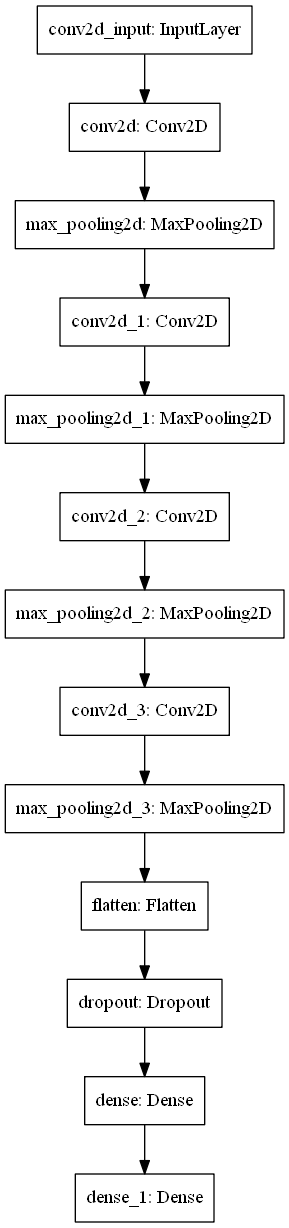

In [ ]:
#Plotting a graphical representation of the model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot

keras.utils.plot_model(model)

## TRAINING

In [ ]:
with tf.device("/device:GPU:0"):
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 10s 103ms/step - loss: 0.6933 - acc: 0.5169 - val_loss: 0.6840 - val_acc: 0.5300
Epoch 2/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6832 - acc: 0.5619 - val_loss: 0.6646 - val_acc: 0.5775
Epoch 3/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6713 - acc: 0.5744 - val_loss: 0.6545 - val_acc: 0.6050
Epoch 4/100
100/100 [==============================] - 11s 109ms/step - loss: 0.6589 - acc: 0.6056 - val_loss: 0.6497 - val_acc: 0.6100
Epoch 5/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6540 - acc: 0.5994 - val_loss: 0.6504 - val_acc: 0.6050
Epoch 6/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6485 - acc: 0.6044 - val_loss: 0.6149 - val_acc: 0.6475
Epoch 7/100
100/100 [==============================] - 11s 114ms/step - loss: 0.6267 - acc: 0.6456 - val_los

## After training:
* **Validation accuracy: 81.25%**
* **Training accuracy: 82.50%**

In [ ]:
model.save("augmented_cnn.h5")

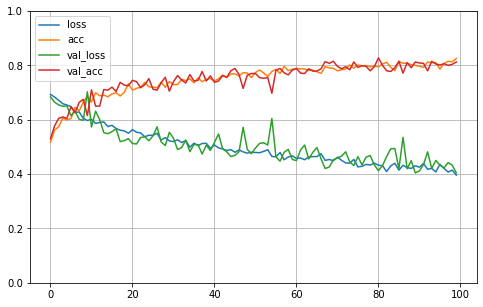

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As we can see this model converges better than last one however it still doesn't converge properly and tends to overfit!! Also the loss is a bit high...

One of the reason of lower performance is that I am not utilizing all the training data, as you can see the batch size was 16 and I could have had 125 maximum steps per epoch, that would have got me 2-4% higher accuracy.

## LOADING THE MODEL USING THE .h5 file
### MODEL ARCHITECTURE

In [ ]:
model = tf.keras.models.load_model('augmented_cnn.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## TESTING
### The proper explanation of testing code is given in the TESTING section of MY MODEL. The same images are used for testing all the models.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


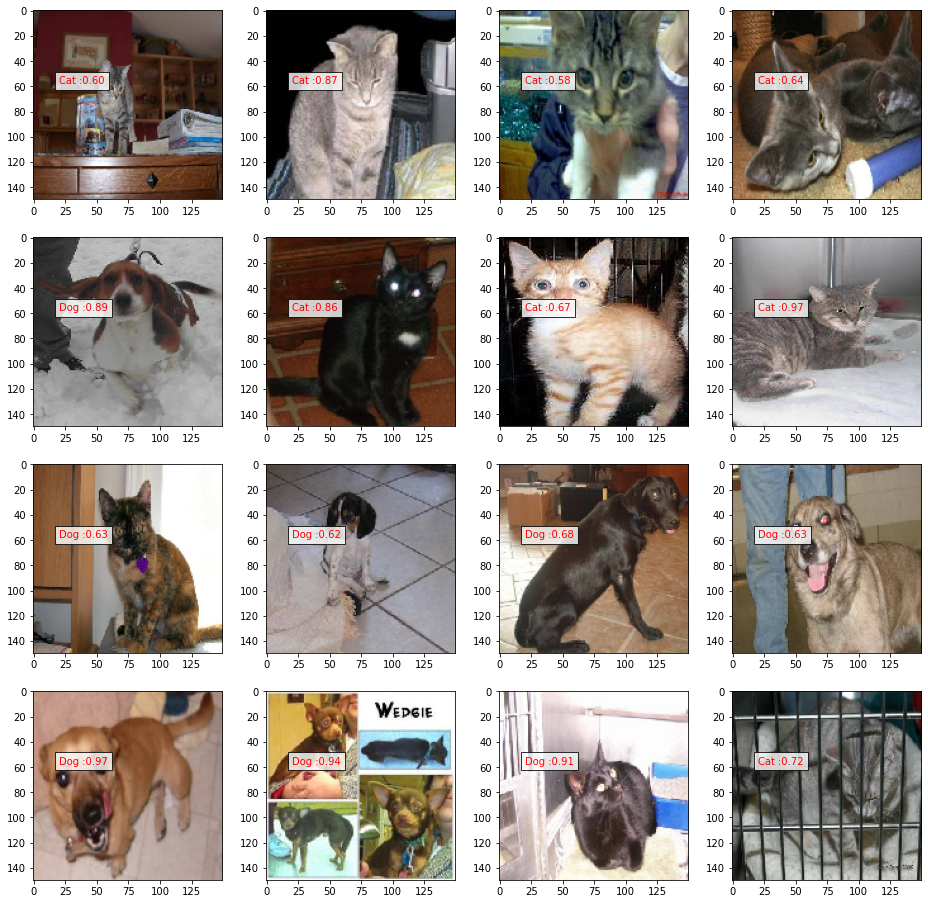

In [ ]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    if(prediction[:,:]>0.5):
        value ='Dog :%.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%.2f'%(1-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

In [ ]:
model.evaluate_generator(test_generator, steps=50)

[0.4314434230327606, 0.8090000152587891]

### **As we can see we get a testing accuracy of 80.9%**

In [ ]:
from PIL import Image
img=Image.open('cat.jpg')
new_img=img.resize((150,150))
new_img.save('cat_new.jpg')

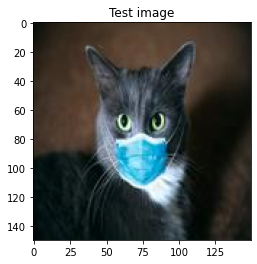

In [ ]:
new_img=plt.imread('cat_new.jpg')
new_img.shape
plt.title('Test image')
plt.imshow(new_img)

In [ ]:
new_img=new_img/255.
new_img=new_img[np.newaxis,:,:,:]
new_img.shape

(1, 150, 150, 3)

Predicted value: [[0.1551843]]


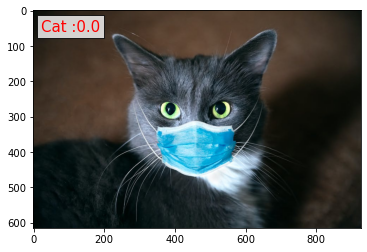

In [ ]:
pred=model.predict(new_img)                  #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                            #Rounding off the output to nearest class 0 or 1
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)

**As we can see this model predicts this image as a cat with 84.49% confidence, as the label for Cat is 0 and the predicted value is 0.155. This means this model performs worser than the previous one for this particular image, where we had got a 97% confidence!! Hence even if a model has high accuracy, it doesn't mean it will perform well on unseen data!**

**Basically the model predcits the image as 84.49% Cat and 15.5% Dog!**

In [ ]:
from PIL import Image
img=Image.open('confuse.jpg')
new_img=img.resize((150,150))
new_img.save('confuse_new.jpg')

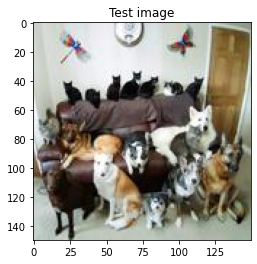

In [ ]:
new_img=plt.imread('confuse_new.jpg')
plt.title('Test image')
plt.imshow(new_img)

In [ ]:
new_img=new_img/255.
new_img=new_img[np.newaxis,:,:,:]
new_img.shape

(1, 150, 150, 3)

Predicted value: [[0.973499]]


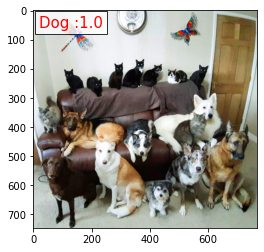

In [ ]:
pred=model.predict(new_img)                    #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                              #Rounding off the output to nearest class 0 or 1
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)

**As we can see this model predicts this image as a dog with 97.34% confidence, as the label for Dog is 1 and the predicted value is also 0.9734. Unlike last image the model performs better on this image than the previous one, since now it also is taking in account the cats present in the pictures. The previous model had predicted this image as a Dog with 100% confidence!**

**Although talking statistically this image has 9 cats and 8 dogs hence statistically the picture has around 53% cats and 47% dogs!! Hoewever visually we can see that the dogs are bigger in size and take up more pixels than the cats and probably that is why our model predicts the image as a Dog with high confidence, the model is trained just to classify the image as cat or a dog, this is not an obeject detection model so the classification will not be based on the count of dogs and cats!!!**

**Basically the model predcits the image as 97.34% Dog and 2.66% Cat!**

In [ ]:
from tensorflow.keras import backend as K

K.clear_session() # Clearing the variables of previous session
del model   #Deleting the previous model so that we can load our new model and perform test on it

#

**======================================================================================================================**
**======================================================================================================================**

#

# III. TRANSFER LEARNING USING VGG16
## The testing and validation is performed for the same images in all models hence for detailed explanation refer the testing and preprocessing parts of MY MODEL

### PERFORMING DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
class_names = ['Cat','Dog'] #Creating a dictionary of class names according to the label

## IMPORTING THE VGG 16 MODEL WEIGHTS for IMAGENET DATASET

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

## VGG16 ARCHITECTURE

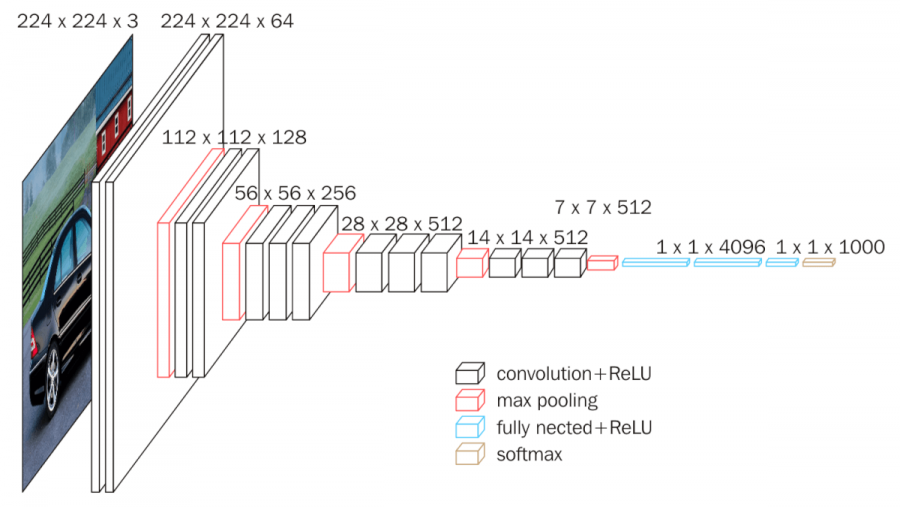

In [ ]:
from IPython.core.display import Image, display
display(Image('https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png', width=700, unconfined=True))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## ADDING LAYERS TO THE VGG 16 Architecture

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

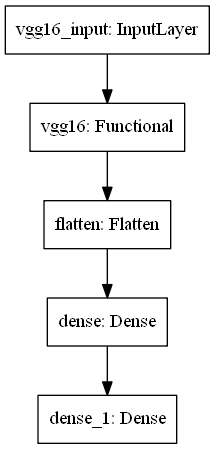

In [ ]:
#Plotting a graphical representation of the model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot

keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**VGG 16 has a heavy architecture and hence if you do not have a dedicated GPU it may take 8-10 hours to training the whole network with the added layers, so you can freeze the VGG16 layers and use the pretrained weights and just train your additional layers; to do so uncomment the next code block**

In [ ]:
# conv_base.trainable = False

I am using RMSprop as an optimizer with a very small learning rate for better results, you can try with Adam optimizer, but Adam optimizer works for some predefined values of learning rate, changing them may not give you a satisfactory result or maybe it will!! Hyperparmeter tuning is still a big challange!

In [ ]:
from tensorflow.keras import optimizers
with tf.device("/device:GPU:0"):
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

**Since the training process will take well enough time hence it is safe to create checkpoints after every epoch!
Also you can resume the training process from where we left off in case it was interrupted or for fine-tuning the model**

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

### TRAINING

In [ ]:
with tf.device("/device:GPU:0"):
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 85s 854ms/step - loss: 0.4644 - acc: 0.7695 - val_loss: 0.1968 - val_acc: 0.9190
Epoch 2/30
100/100 [==============================] - 86s 860ms/step - loss: 0.2614 - acc: 0.8940 - val_loss: 0.1260 - val_acc: 0.9490
Epoch 3/30
100/100 [==============================] - 86s 863ms/step - loss: 0.2131 - acc: 0.9135 - val_loss: 0.1129 - val_acc: 0.9570
Epoch 4/30
100/100 [==============================] - 87s 867ms/step - loss: 0.1716 - acc: 0.9340 - val_loss: 0.1130 - val_acc: 0.9510
Epoch 5/30
100/100 [==============================] - 90s 897ms/step - loss: 0.1633 - acc: 0.9395 - val_loss: 0.3568 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 90s 902ms/step - loss: 0.1321 - acc: 0.9470 - val_loss: 0.0896 - val_acc: 0.9650
Epoch 7/30
100/100 [==============================] - 90s 903ms/step - loss: 0.1067 - acc: 0.9590 - val_loss: 0.10

# After training:
* **Validation accuracy:96.1%**
* **Training accuracy:98.65%**

In [ ]:
model.save("vgg16_cnn.h5")   #Saving the model to avoid retraining

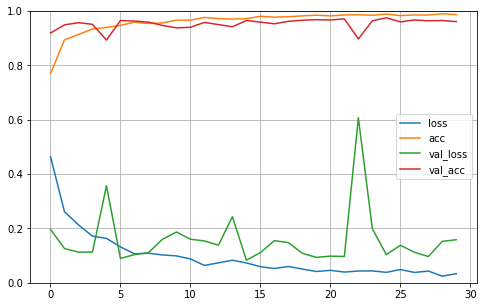

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As we can see this model converges pretty well!! But the spike at the 23rd epoch is very peculiar, as we can see at the 23rd epoch the loss increases suddenly and thereafter things are back on track.

The reason to this is something very intrinsic to the way optimizers work, note that I had used RMSprop as an optimizer, if you go through the algorithm you will get to know that it uses mini batches of the data for optimizing weights, other optimizers like Stochastic Gradient Descent(batch=1), Adam etc also use mini batches.

When mini batches are used to update weights the spikes are an unavoidable consequence. Some mini-batches have 'by chance' unlucky data for the optimization!! The same doesn't happen in (Full) Batch Gradient Descent because it uses all training data in each optimization epoch.


### Saving the model history at every epoch into a DataFrame as I don't wanna loose this data, even after using a dedicated GPU it took me an average of 90 seconds per epoch to train the complete model!

In [ ]:
hist_df = pd.DataFrame(history.history)

In [ ]:
hist_df.head()

loss     acc  val_loss  val_acc
0  0.464398  0.7695  0.196813    0.919
1  0.261371  0.8940  0.125977    0.949
2  0.213130  0.9135  0.112887    0.957
3  0.171578  0.9340  0.113047    0.951
4  0.163340  0.9395  0.356810    0.893

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## LOADING THE MODEL USING THE .h5 file
### MODEL ARCHITECTURE

In [ ]:
model = tf.keras.models.load_model('vgg16_cnn.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


## TESTING
#### The proper explanation of testing code is given in the TESTING section of MY MODEL. The same images are used for testing all the models.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


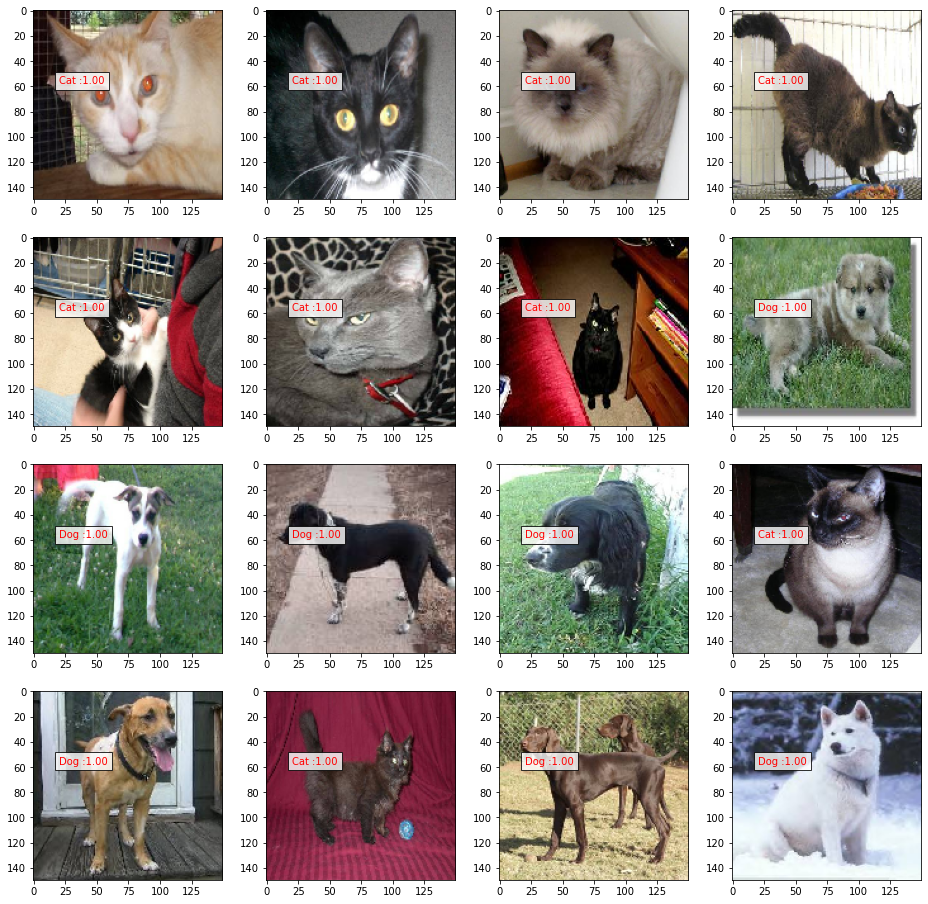

In [ ]:
imgs, labels = next(test_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    if(prediction[:,:]>0.5):
        value ='Dog :%.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%.2f'%(1-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

### As we can see compared to last two models this model gives the best and appropriate predictions

In [ ]:
model.evaluate_generator(test_generator, steps=50)

[0.21641576290130615, 0.9580000042915344]

### **As we can see we get a testing accuracy of 95.8%**

In [ ]:
from PIL import Image
img=Image.open('cat.jpg')
new_img=img.resize((150,150))
new_img.save('cat_new.jpg')

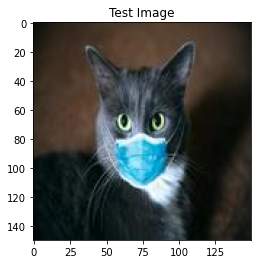

In [ ]:
img_test=plt.imread('cat_new.jpg')
img_test.shape
plt.title('Test Image')
plt.imshow(img_test)

In [ ]:
img_test=img_test/255.
img_test=img_test[np.newaxis,:,:,:]
img_test.shape

(1, 150, 150, 3)

Output of Model:[[2.1080871e-15]]


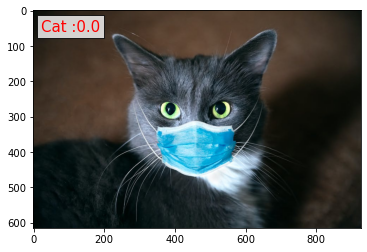

In [ ]:
pred=model.predict(img_test)                     #Predicting the output
print('Output of Model:{}'.format(pred))
pred=pred.round()                                #Rounding off the output to nearest class 0 or 1
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)

**As we can see this model predicts this image as a cat with almost 100% confidence, as the label for Cat is 0 and the predicted value is 2e-15 which is as good as zero. This means this model perfectly classifies this image as a cat unlike previous two!**

In [ ]:
from PIL import Image
img=Image.open('confuse.jpg')
new_img=img.resize((150,150))
new_img.save('confuse_new.jpg')

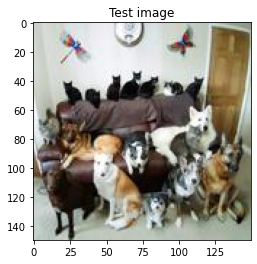

In [ ]:
new_img=plt.imread('confuse_new.jpg')
plt.title('Test image')
plt.imshow(new_img)

In [ ]:
new_img=new_img/255.
new_img=new_img[np.newaxis,:,:,:]
new_img.shape

(1, 150, 150, 3)

Predicted value: [[0.77580434]]


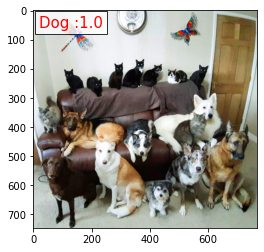

In [ ]:
pred=model.predict(new_img)                    #Predicting the output
print("Predicted value: {}".format(pred))
pred=pred.round()                              #Rounding off the output to nearest class 0 or 1
value ='{} :{}'.format(class_names[int(pred)],pred[0,0])  #getting the class name from dictionary
plt.text(20, 58,value,color='red',fontsize=15,bbox=dict(facecolor='white',alpha=0.8)) #Displaying the class along with class value
plt.imshow(img)

**As we can see this model predicts this image as a dog with 77.58% confidence, as the label for Dog is 1 and the predicted value is also 0.7758. As discussed in the previous model the picture has around 53% cats and 47% dogs "statistically", and in comparison to previous model the confidence has come doen to 77% from 97 % hence this model definitely performs better than the previous one on this image**

**Basically the model predcits the image as 77.58% Dog and 22.42% Cat!**

**Maybe making the model more complex will increase the performance, I doubt not as the model history shows that the model is converging pretty well and usually deeper models tend to overfit, VGG16 itself is quite a deep architecture. But when model start to get deep things are pretty uncertain in between, there is no harm in testing until you have enough compuatation power!**

In [ ]:
from tensorflow.keras import backend as K

K.clear_session() # Clearing the variables of previous session
del model   #Deleting the previous model so that we can load our new model and perform test on it

#

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#

CNNs derive their name from the “convolution” operator. The primary purpose of Convolution in case of a CNNs is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.

Let us look at the outputs of the of the convolutional layers for an image! In the forst model there were total of 4 convolutional layers with 32,64,128,128 filters respectively. The output of these convolutional layers is the combined output of all these filters!!

### Let us first load our model!

In [ ]:
model = tf.keras.models.load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Loading and processing our test image

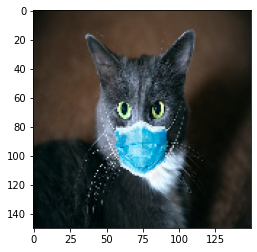

In [ ]:
from keras.preprocessing import image
img = image.load_img('cat.jpg', target_size=(150, 150))
plt.imshow(img)
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)


### Let us look at the output of individual convolutional layers for this image!!


In [ ]:
#Printing the name of layers in the model
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten', 'dense', 'dense_1']


In [ ]:
#Storing the output of all the four convolutional layers
from tensorflow.keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

In [ ]:
#Predicting the output of these layers for our test image
conv2d_features = conv2d_output.predict(test_image)
conv2d_1_features = conv2d_1_output.predict(test_image)
conv2d_2_features = conv2d_2_output.predict(test_image)
conv2d_3_features = conv2d_3_output.predict(test_image)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('Second conv layer feature output shape : ',conv2d_1_features.shape)
print('Third conv layer feature output shape : ',conv2d_2_features.shape)
print('Fourth conv layer feature output shape : ',conv2d_3_features.shape)

First conv layer feature output shape :  (1, 148, 148, 32)
Second conv layer feature output shape :  (1, 72, 72, 64)
Third conv layer feature output shape :  (1, 34, 34, 128)
Fourth conv layer feature output shape :  (1, 15, 15, 128)


## Output of first convolutional layer

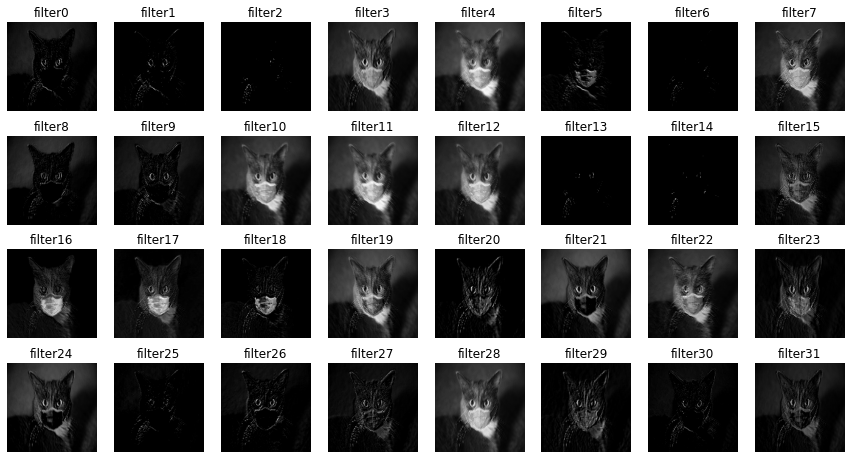

In [ ]:
fig=plt.figure(figsize=(15,8))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

## Output of second convolutional layer

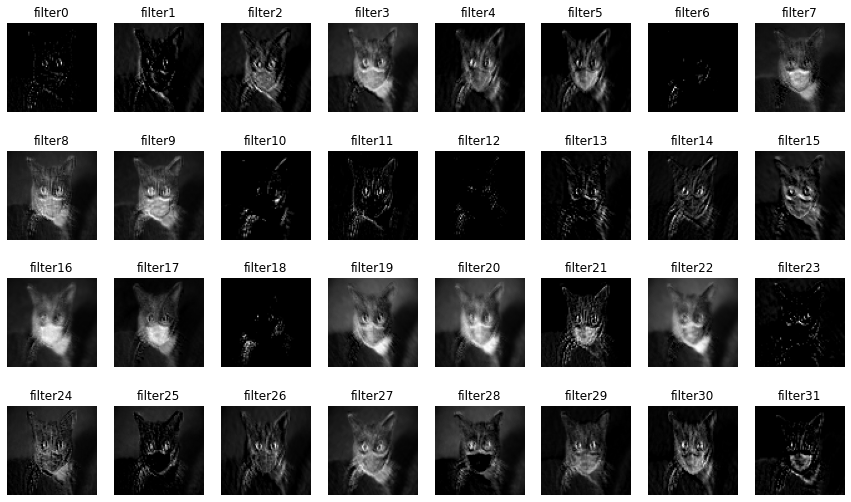

In [ ]:
fig=plt.figure(figsize=(15,9))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()


In [ ]:
# Note that we are looking at the output for first 32 filters only, this layer has 64 filters,
# if you wish to see the output for a particular filter then uncomment the code below and replace
# i with the filter whose output you want to see!!

# plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')


## Output of third convolutional layer

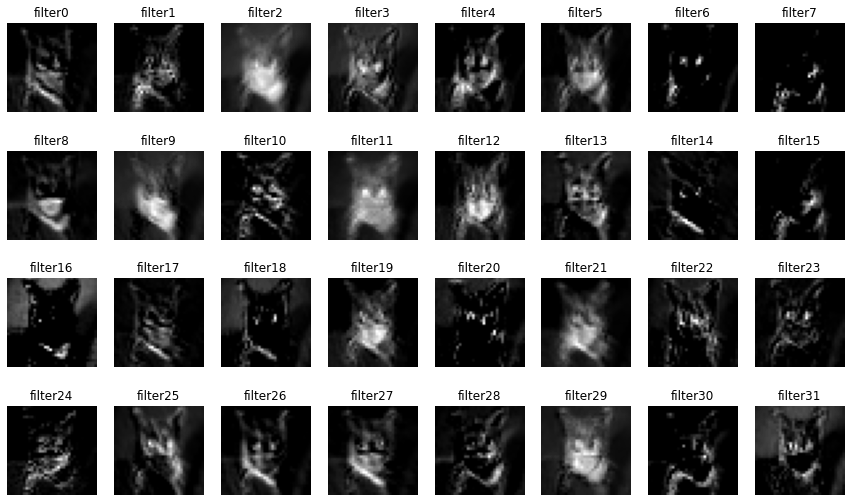

In [ ]:
fig=plt.figure(figsize=(15,9))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='gray')
plt.show()


In [ ]:
# Note that we are looking at the output for first 32 filters only, this layer has 128 filters,
# if you wish to see the output for a particular filter then uncomment the code below and replace
# i with the filter whose output you want to see!!

# plt.imshow(conv2d_2_features[0, :, :, i], cmap='gray')

## Output of fourth convolutional layer

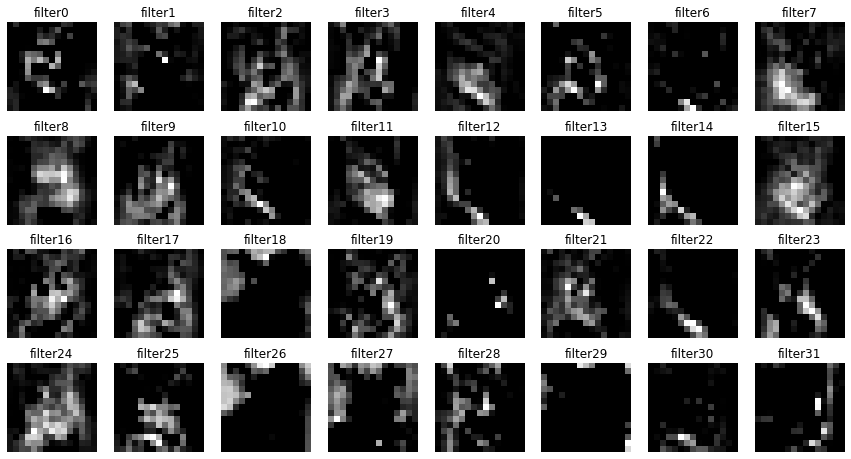

In [ ]:
fig=plt.figure(figsize=(15,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='gray')
plt.show()

In [ ]:
# Note that we are looking at the output for first 32 filters only, this layer has 128 filters,
# if you wish to see the output for a particular filter then uncomment the code below and replace
# i with the filter whose output you want to see!!

# plt.imshow(conv2d_3_features[0, :, :, i], cmap='gray')

These outputs of filters are also known as feature maps. A filter slides over the input image (convolution operation) to produce a feature map. The convolution of another filter, over the same image gives a different feature as observed.

CNN learns the values of these filters on its own during the training process (although we still need to specify parameters such as number of filters, filter size, architecture of the network etc. before the training process). The more number of filters we have, the more image features get extracted and the better our network becomes at recognizing patterns in unseen images!!

We can see that as we go for deeper convolutional layers, the filters extract more specific and intricate features!!!
While the outputs of the first two convolutional layers detect mainly the edges, the third and fourth convolutional layers extract very specific features at the pixel level!!

**However after every convolutional layer I have also added a maxpooling layer, let us look the output of maxpool layer!!**

I will be looking at the output of the first maxpool layer for a particular filter as I just want to verify the operation of maxpooling layer, which is to reduce the spatial size of the feature map hence the resolution of our feature map should be reduced after applying the maxpool layer, for checking that I will also plot the input given to the maxpool layer which is nothing but the output of the preceeding convolutional layer!!

In [ ]:
maxpool_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
maxpool_features = maxpool_1_output.predict(test_image)

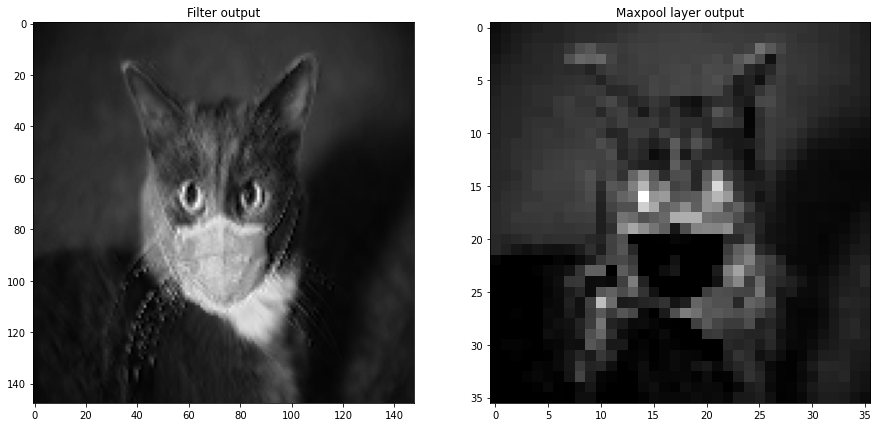

In [ ]:
fig=plt.figure(figsize=(15,8))
fig.add_subplot(1, 2, 1)
plt.title('Filter output')
plt.imshow(conv2d_features[0, :, :, 28], cmap='gray')
fig.add_subplot(1, 2, 2)
plt.title('Maxpool layer output')
plt.imshow(maxpool_features[0, :, :, 28], cmap='gray')
plt.show()

As we can observe after applying the maxpooling layer the resolution of our feature map has reduced but the output feature maps still preserves the important features from the input feature map hence the feature map now represents the important features only and is more managable, thereby reducing the computations!!!

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()
del model

## Conclusion
This project is inspired by the Kaggle Challange held in 2003 in which thousands of images of cats and dogs were given
and a model was to be built to classify those images into cats and dogs.

The best accuracy achieved in that competition was 98%!!

I used a subset of that data and built my model, in the original dataset there were around 25000 images for training but I am only using 2000 images..

I used three different achitectures to train this dataset and increased the validation accuracy from around 73% to 96%!!!

My first model was a simple CNN network with four convolutional layers, in my second model I used data augmentation and finally in my final model I used transfer learning using VGG16 and acheived a validation accuracy of 96.1% which is pretty good!!
It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training. You can download the models from this repository and play with it.